In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris


In [3]:
df=load_iris()
df

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
df_iris=pd.DataFrame(df['data'],columns=df['feature_names'])
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
#to check that data is normally distributed or not

import scipy.stats as st
import pylab

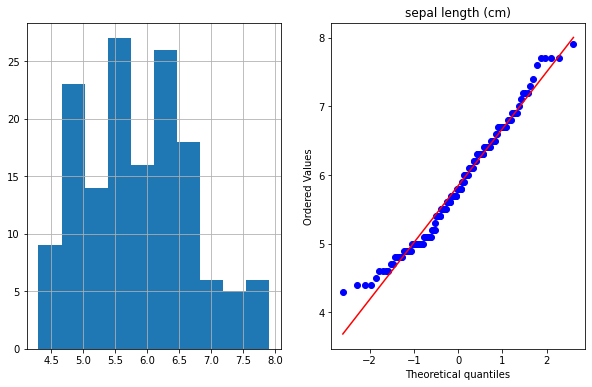

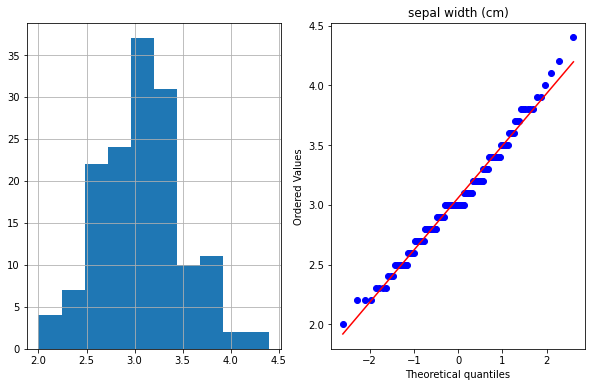

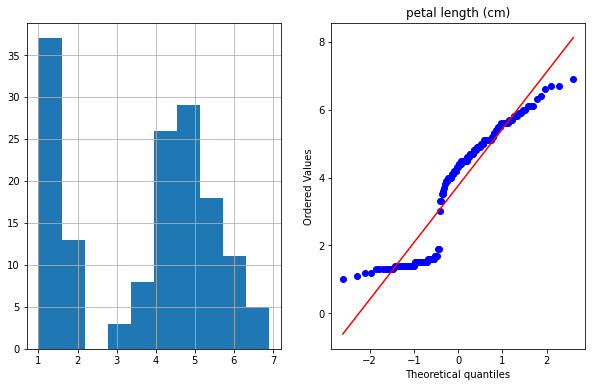

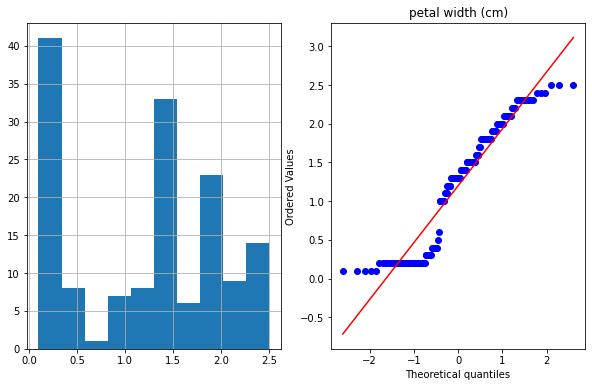

In [6]:
for feature in df_iris.columns:
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df_iris[feature].hist()
    plt.subplot(1,2,2)
    st.probplot(df_iris[feature],dist='norm',plot=pylab)
    plt.title(feature)
    plt.show()

In [7]:
df_iris['petal_boxcox'],parameters=st.boxcox(df_iris['petal length (cm)'])


In [8]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),petal_boxcox
0,5.1,3.5,1.4,0.2,0.395155
1,4.9,3.0,1.4,0.2,0.395155
2,4.7,3.2,1.3,0.2,0.297195
3,4.6,3.1,1.5,0.2,0.492636
4,5.0,3.6,1.4,0.2,0.395155


In [9]:
X=df_iris.iloc[:,0:4]
Y=df.target


In [10]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=1)


In [11]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
model1=GaussianNB()
model2=BernoulliNB()
model3=MultinomialNB()

In [12]:
model1.fit(Xtrain,ytrain)
model2.fit(Xtrain,ytrain)
model3.fit(Xtrain,ytrain)

MultinomialNB()

In [13]:
pv1=model1.predict(Xtest)
pv1

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2])

In [14]:
prob=model1.predict_proba(Xtest)
prob

array([[1.00000000e+000, 2.72754528e-018, 1.38410356e-024],
       [9.83423140e-034, 9.99999502e-001, 4.98058088e-007],
       [9.12231968e-106, 9.76597403e-001, 2.34025973e-002],
       [1.00000000e+000, 2.92410392e-016, 4.31696564e-023],
       [6.51371000e-285, 5.03077516e-010, 9.99999999e-001],
       [4.64426620e-129, 5.19388953e-001, 4.80611047e-001],
       [6.40284018e-205, 2.89519883e-007, 9.99999710e-001],
       [1.00000000e+000, 4.62440661e-012, 7.46728108e-019],
       [1.00000000e+000, 9.95584362e-017, 1.04143845e-023],
       [2.20765504e-245, 6.93030475e-009, 9.99999993e-001],
       [5.61343496e-088, 9.99628939e-001, 3.71061205e-004],
       [1.00000000e+000, 8.25252306e-014, 1.49872783e-020],
       [1.26421394e-246, 9.66032525e-008, 9.99999903e-001],
       [5.29996294e-114, 9.02696828e-001, 9.73031719e-002],
       [7.79907439e-113, 9.70957166e-001, 2.90428338e-002],
       [1.00000000e+000, 1.67625768e-018, 1.51749768e-025],
       [1.14970908e-075, 9.99929671e-001

In [42]:
from sklearn.metrics import accuracy_score,confusion_matrix
accu=accuracy_score(ytest,pv1)
accu

0.9666666666666667

In [43]:
cm=confusion_matrix(ytest,pv1)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

In [44]:
# for model 2
pv2=model2.predict(Xtest)
pv2

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

In [45]:
accu2=accuracy_score(ytest,pv2)
accu2

0.2

In [46]:
cm2=confusion_matrix(ytest,pv2)
cm2

array([[ 0,  0, 11],
       [ 0,  0, 13],
       [ 0,  0,  6]])

In [47]:
pv3=model3.predict(Xtest)
pv3

array([0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2,
       2, 0, 2, 2, 0, 0, 2, 2])

In [49]:
accu3=accuracy_score(ytest,pv3)
accu3

0.5666666666666667

In [51]:
cm3=confusion_matrix(ytest,pv3)
cm3

array([[11,  0,  0],
       [ 0,  0, 13],
       [ 0,  0,  6]])

In [61]:
# checking accuracy of all models
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
models=[GaussianNB(),MultinomialNB(),BernoulliNB()]
ac=[]
for i in range(len(models)):
    model=models[i]
    model.fit(Xtrain,ytrain)
    pv=model.predict(Xtest)
    ac.append(accuracy_score(ytest,pv))
ac
    

[0.9666666666666667, 0.5666666666666667, 0.2]

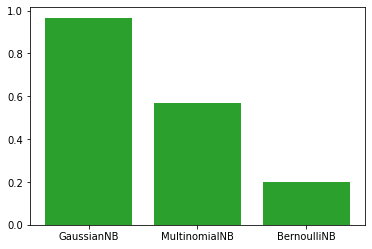

In [62]:
#plotting models accuracy
for i in range(len(models)):
    plt.bar(['GaussianNB','MultinomialNB','BernoulliNB'],ac)